# Trabalho de Termodinâmica Aplicada: 
### Cálculos de propriedades termodinâmicas e de equilíbrio de fases utilizando equações de estado e modelos de G de excesso

In [1]:
from scipy import optimize as opt

#### O objetivo deste trabalho é realizar cálculos de propriedades termodinâmicas para os componentes puros ÁGUA e ETANOL, considerando a Equação de Estado SRK, e em seguida realizar cálculos para a mistura destes compostos, utilizando o modelo NRTL de G de excesso. 

#### Para facilitar a execução, este trabalho foi dividido em três arquivos:
>* 1- Cálculos para o componente puro AGUA
>* 2- Cálculos para o componente puro ETANOL
>* 3- Cálculos para o sistema binário AGUA + ETANOL

### *3) Cálculos para o sistema binário AGUA + ETANOL

O primeiro passo é avaliar o sistema pela Regra das fases de Gibbs, para conhecer os graus de liberdade permitidos. Assim, para dois componentes, em equilíbrio L-V:  

Variância = C − F + 2 = 2 - 2 + 2  = 2

Entao, são necessários 2 variáveis independentes para caracterizar o sistema. 

#### *A) Equilíbrio líquido-vapor de misturas*


Há duas opções para o cálculo de propriedades de misturas: 
>* usar EoS direto para as duas fases
>* usar propriedades em excesso para a fase líquida

No caso de fases líquidas é comum utilizar as chamadas propriedades em excesso, e modelos de G de excesso. Estes modelos consideram a não-idealidade da fase líquida ao incluir o coeficiente de atividade dos componentes presentes na fase. 

##### Equilibrio de fases

Na condição de equilíbrio, há igualdade de potenciais quimicos de cada componente em cada fase, nas mesmas condições de P e T. Então, podemos ter:

>* f^i(v)(T,P,y) = yi.FI^i(v)(T,P,y).P
>* f^i(l)(T,P,x) = xi.FI^i(l)(T,P,x).P                          (usando EOS para fase l) 
>* f^i(l)(T,P,x) = xi.GAMAi(T,x).Pisat.FIisat,correcao de Point (usando modelos Gexcesso)
(f^i = fugacidade de i na mistura; FI^i = coeficiente de fugacidade)

Assim, para o equilíbrio usa-se dois tipos de equações. 
>* *EoS para as duas fases:*
>* yi.FI^i(v)(T,P,y)=xi.FI^i(l)(T,P,x)

>* *Gexcesso para a fase L:*
>* yi.FI^i(v)(T,P,y).P = xi.GAMAi(T,x).Pisat.FI^isat.correcao de Point 

Seguindo a equação que considera um modelo de Gexcesso, pode-se fazer duas simplificações:
>* considerar mistura ideal na fase gasosa. Chega-se a   yi.P = xi.GAMAi.Pisat (Lei de Raoult modificada)
Esta simplificação pode ser feita pois o termo *FI^isat.correcao de Point* pode ser aproximado para um, pois os efeitos se compensam. 

>* considerar mistura ideal na fase líquida. Chega-se a  yi.P = xi.Pisat (Lei de Raoult) 

Neste trabalho será utilizada a Lei de Raoult modificada:

${y(i)}{P} = {x(i)}{Gamma(i)}{P(i)sat}$ 

Para realizar os cálculos anteriores é necessário conhecer as pressões de saturação dos componentes da mistura. Este cálculo será feito pela Equação de Antoine, para tentar ter alguma precisão experimental e não considerar a equação de estado.E também por este motivo utilizaremos um modelo de G de excesso.

## Cálculo de ${P}^{\mathrm{ sat}}$ pela Equação de Antoine

In [2]:
# Definição de Psat(T,Componente)
# Fonte DDBST

def P_antoine(T,comp):
    
    A=0
    B=0
    C=0
    
    if comp == 1: # Água
        if T<(1+273.15):
            return 0
    
        elif T<(100+273.15):
            A = 8.07131
            B = 1730.63
            C = 233.426
            
        elif T<(374+273.15):
            A = 8.14019
            B = 1810.94
            C = 244.485
        
        else:
            return 0
       
    elif comp == 2: #Etanol
        if T<(-57+273.15):
            return 0
    
        elif T<=(80+273.15):
            A = 8.20417
            B = 1642.89
            C = 230.3
            
        elif T<=(243+273.15):
            A = 7.68117
            B = 1332.04
            C = 199.2
        
        elif T == 5.1635e2:
            return 6.3e6
        
        else:
            return 0
    
      
    return 10**(A - B/(C+T-273.15))*101325/760 # T em Kelvin e P convertido para Pascal

Conhecendo-se as pressões de saturação, pode-se seguir para o cálculo de Gama da mistura, pois vamos considerar que não podemos utilizar equações de estado para a fase líquida. 


## Modelo NRTL pra Energia de Gibbs em Excesso ${G}^{\mathrm{ E}}$

O modelo de G de excesso escolhido neste trabalho é o modelo NRTL, descrito a seguir.

$$ \frac{g^E}{RT}=\sum_{i=1}^n \left[ x_i\frac{\sum_{j=1}^n \left[ \tau_{j,i} G_{j,i} x_{j} \right] }{\sum_{k=1}^n \left[ G_{k,i} x_k \right] } \right] $$

Onde:

$\tau_{i,j}= \frac{g_{i,j}-g_{j,j}}{RT}=\frac{A_{i,j}}{T}$

$G_{i,j}=\mathrm{exp}(-\alpha_{i,j} \tau_{i,j})$

Cada diferença $(g_{i,j}-g_{j,j})$ (em unidades de energia) e cada parametro de interação binaria  $A_{i,j}$ (em unidades de temperatura) são ajustados experimentalmente. 

Os coeficientes de atividade são calculados a partir derivação da expressão acima em relação ao numero de moles de cada componente i, mantendo constantes T, P e os demais componentes. 

 $$ln(\gamma_i)= \frac{\sum_{j=1}^n\left[\tau_{j,i} G_{j,i} x_{j}\right]}{\sum_{k=1}^n\left[G_{k,i}x_{k}\right]} + \sum_{j=1}^n\left[ \left(\frac{\ G_{i,j} x_{j}}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]}\right) \left(\tau_{i,j}-\frac{\sum_{r=1}^n\left[\tau_{i,r} G_{i,r} x_{i}\right]}{\sum_{k=1}^n\left[G_{k,j}x_{k}\right]} \right) \right] $$
 
Chafer calculou os coeficientes de interação binária entre água e etanol. Estes dados foram utilizados neste trabalho.
(Cháfer, Muñoz, Burguet, Berna, The influence of the temperature on the liquid–liquid equlibria of the mixture limonene + ethanol + $\mathrm {H_2O}$, Fluid Phase Equilibria 224 (2004) 251–256 doi:10.1016/j.fluid.2004.06.045)

In [3]:
import numpy as np

# Temperatura e composições de teste

T = 293.15            #K
x = np.array([.5,.5]) #normalized



#parâmetros do Renon, 1969

# Ethyl acetate (1) + water (2) + ethanol (3)

#alpha12 = 0.4
#alpha23 = 0.3
#alpha13 = 0.3


alpha12 = alpha21 = 0.3

#parâmetros do Renon, 1969

# Ethyl acetate (1) + water (2) + ethanol (3)
# 6 binary Aij parameters
#Dg12 = 1335 #K
#Dg21 = 2510 #K
#Dg23 = 976 #K
#Dg32 = 88 #K
#Dg13 = 301 #K
#Dg31 = 322 #K



# Parâmetros de interação binárias

A12 = 976 #K
A21 = 88 #K

In [4]:
#assemble matrix with regressed parameters A_i,j, according to the model all diagonal terms are zero
A = np.array([[0, A12],
             [A21, 0]])

#assemble symmetric matrix alpha
alpha = np.array([[0, alpha12],
                [alpha21, 0]])

print(alpha)

[[ 0.   0.3]
 [ 0.3  0. ]]


In [5]:
#verify the assembled matrices

#we can now automatically loop through its elements

print("i,j,alpha[i,j],A[i,j]")
for i in range(2):
    for j in range(2):
        print(i,j,alpha[i,j],A[i,j])
        


i,j,alpha[i,j],A[i,j]
0 0 0.0 0
0 1 0.3 976
1 0 0.3 88
1 1 0.0 0


In [6]:
# Matriz Tau

tau=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        tau[j,i]=A[j,i]/T
print("tau=")
print(tau)

print("")

# Matriz G

G=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
print("G=")
print(G)

tau=
[[ 0.          3.32935357]
 [ 0.30018762  0.        ]]

G=
[[ 1.          0.36831893]
 [ 0.91387975  1.        ]]


In [7]:
# Definição de Gamma

def Gamma(T,x,alpha,A):

    tau=np.zeros([2,2]) # Água e Etanol
    for j in range(2):
        for i in range(2):
            tau[j,i]=A[j,i]/T    
    
    G=np.zeros([2,2])
    for j in range(2):
        for i in range(2):
            G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
    
    Gamma=np.zeros([2])
    for i in range(2):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(2):
            Sj1 += tau[j,i]*G[j,i]*x[j]
            Sj2 += G[j,i]*x[j]
    
            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(2):
                Sk1 += G[k,j]*x[k]
                Sk2 += x[k]*tau[k,j]*G[k,j]
                Sk3 += G[k,j]*x[k]
            
            Sj3 += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
        
        Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
    return Gamma

print(Gamma(T,x,alpha,A))

[ 2.06142336  1.37180318]


In [8]:
# Teste do cálculo de Psat por Antoine

print("P_sat 1 =",P_antoine(T,1),"Pa")
print("P_sat 2 =",P_antoine(T,2),"Pa")

P_sat 1 = 2329.5753519365844 Pa
P_sat 2 = 5826.254353148996 Pa


## Cálculo da Pressão de Bolha da mistura (${P}_{\mathrm{ bolha}}$)

In [9]:
# P_bolha = Somatório (x(i) * gamma(i)* P(i)_sat)

def P_bolha(T,x):
    
    P = np.zeros(2)
    
    for i in range (2): # 2 componentes
        
        P[i] = x[i]*Gamma(T,x,alpha,A)[i]*P_antoine(T,i+1) # Para i=0 -> Componente=1 | Para i=1 -> Componente=2)
#        print (i,P[i])
    
    return P[i]+P[i-1]

# Teste da função

T_teste = 293.15
x_teste = [.5,.5]

# Imprime dos valores para as condições de teste

print("x 1 =",x_teste[0])
print("x 2 =",x_teste[1])
print("")
print("Gamma 1 =",Gamma(T_teste,x_teste,alpha,A)[0])
print("Gamma 2 =",Gamma(T_teste,x_teste,alpha,A)[1])
print("")
print("P_sat 1 =",P_antoine(T_teste,1),"Pa")
print("P_sat 2 =",P_antoine(T_teste,2),"Pa")
print("")
print("P_bolha =",P_bolha(T_teste,x_teste),"Pa")

x 1 = 0.5
x 2 = 0.5

Gamma 1 = 2.06142336153
Gamma 2 = 1.37180317791

P_sat 1 = 2329.5753519365844 Pa
P_sat 2 = 5826.254353148996 Pa

P_bolha = 6397.35764495 Pa


## Cálculo da curva de ELV da mistura (${P}_{\mathrm{ bolha}}$ e ${P}_{\mathrm{ orvalho}}$ )


In [10]:
# Temperatura

T_dado = 423.15 # Unidade K

grid_x1       = np.zeros(101)
grid_y1       = np.zeros(101)
grid_P_bolha  = np.zeros(101)

i = 0

for x1 in np.linspace(0,1,101):
    
    grid_x1[i]      = x1
    
    x2              = 1 - x1

    x_vetor         = [x1,x2]
    
    grid_P_bolha[i] = P_bolha(T_dado,x_vetor)
    
    grid_y1[i]      = x1*Gamma(T_dado,x_vetor,alpha,A)[0]*P_antoine(T_dado,1)/P_bolha(T_dado,x_vetor)
    
#    print(i,x1,u[i],grid_P_bolha[i])
    
    i = i+1
    
#print(grid_x1,grid_P_bolha,grid_y1)




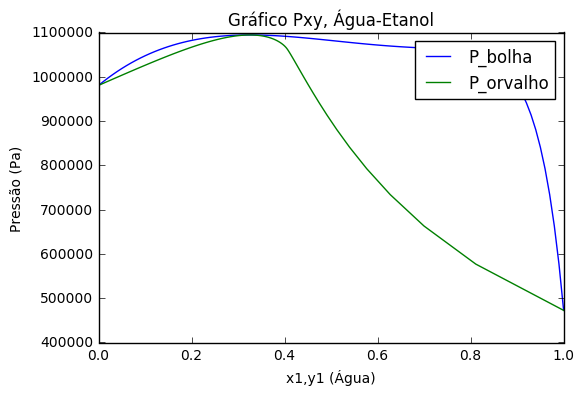

In [11]:
## Plotando o gráfico 

import matplotlib.pyplot as plt
%matplotlib inline

#ativar uma figura 1
plt.figure(1)

#legend=[] #iniciador do objeto legenda

#plt.subplot(121) #activate a subplot
plt.title('Gráfico Pxy, Água-Etanol')
plt.xlabel('x1,y1 (Água)')
plt.ylabel('Pressão (Pa)')
plt.xlim([0,1])
#traçar

plt.plot(grid_x1,grid_P_bolha, label='P_bolha') #label é a etiqueta que será usada na legenda
plt.plot(grid_y1,grid_P_bolha, label='P_orvalho') #label é a etiqueta que será usada na legenda

plt.legend(loc=1)

plt.show()

## Cálculo de Propriedades Termodinâmicas de Misturas

Nesta parte do trabalho serão calculadas as propriedades em excesso: entalpia, energia de Gibbs e entropia. Ao final será feita uma comparação com dados experimentais

Propriedade em excesso é a diferença entre o valor de uma propriedade para uma solução real e o valor da mesma propriedade para uma solução ideal, nas mesmas condições de T, P e x

$\frac{G^e}{RT} = \frac{H^e}{RT} - \frac{S^e}{R}$

$\frac {Ge}{RT} = somatorio(xi.lnGAMAi)$ (lnGAMAi é a propriedade parcial molar de Ge/RT)

Para P e x constantes: 

${H^e} = - {RT}{^2} \frac{d(G^e/RT)}{dT} $

${S^e} =\frac{H^e-G^e}{T} $


In [12]:
## Propriedades de Excesso


T_dado = 323.15 # Unidade K

# Constante de gás
R = 8.3144598 #J.mol^−1.K^−1

u=np.zeros(101)
G_exc=np.zeros(101)

i = 0
for x1 in np.linspace(0,1,101):
        
    u[i] = x1
    x2 = 1 - x1
    x_vetor = [x1,x2]
    
    
    Gamma_vetor=Gamma(T_dado,x_vetor,alpha,A)
    
    Gamma1=Gamma_vetor[0]
    Gamma2=Gamma_vetor[1]
    
    #print(Gamma1,Gamma2)

    G_exc[i]=R*T_dado*(x1*np.log(Gamma1)+x2*np.log(Gamma2))
             
   
    i = i+1


#print(G_exc)


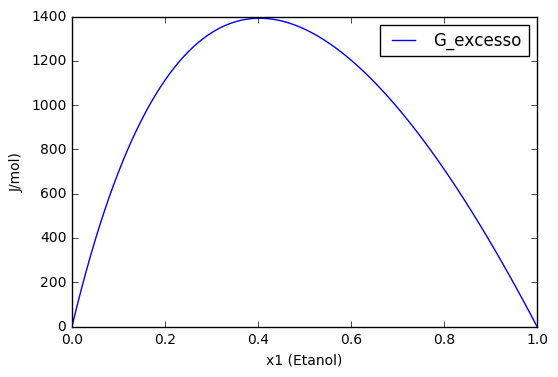

In [13]:
#plt.figure(1)

#legend=[] #iniciador do objeto legenda

plt.xlabel('x1 (Etanol)')


#traçar

plt.plot(1-u,G_exc, label='G_excesso') #label é a etiqueta que será usada na legenda
plt.ylabel('J/mol)')
plt.legend(loc=1)

plt.show()